# TP n°3 (TP noté) : Moindres carrés

### IMPORTATION DES LIBRAIRIES

In [2]:
import numpy as np
import random as rdm
import pandas as pd
from download import download
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

### EXERCICE 1 - Préliminaires

In [5]:
##Question 1.
nom_fichier = "tp_note3_hlma408_gr_nbgr_bastien_thouroude.ipynb"

##Question 2.
alpha = len(nom_fichier) / 1000

print("Alpha = " + str(alpha) + ", soit " + str(alpha * 100) + " %")

##Calcul du quantile(1 - alpha) (a écrire)
quantile = 0

print("Le quantile (1 - alpha) d'une loi gausienne centrée réduite est : " + str(quantile))

Alpha = 0.048, soit 4.8 %
Le quantile (1 - alpha) d'une loi gausienne centrée réduite est : 0


### EXERCICE 2 - Dés et tirages aléatoires

In [40]:
##Question 1.
def echantillon_de4 (n_samples) :

    ##Je définis un vecteur de taille n_samples remplit de 0
    tirage = np.zeros(n_samples)

    ##Pour chaque élément de mon vecteur, je tire une valeur aléatoire et uniforme sur [1; 4]
    for i in range(n_samples) :
        tirage[i] = rdm.uniform(1,4)
    
    return tirage


##Question 2.
tirage1000 = echantillon_de4(1000)
for i in range(1000) : 
    ##Calculer les fréquences empiriques
    pass
##print(tirage1000)

##Question 3.

### EXERCICE 3 - Prairies et rendement agricole

In [107]:
##Question 1.
##Je rentre mon url dans une variable pour pouvoir aisément en changer
url = "http://josephsalmon.eu/enseignement/datasets/prairie.txt"

#Je récupère le fichier dans un table (en fixant le délimiteur de colonne par un espace ' ')
prairie = np.genfromtxt(url, delimiter=' ', skip_header=1)
prairie = pd.DataFrame(prairie)

print(prairie)

##Question 2.
##Tracer les graphes
#ax = sns.swarmplot(data=prairie, inner=None)

       0    1
0   2.06  1.0
1   1.59  2.0
2   1.92  3.0
3   2.91  1.0
4   1.57  2.0
5   2.43  3.0
6   2.99  1.0
7   2.63  2.0
8   1.85  3.0
9   3.27  1.0
10  1.82  2.0
11  2.17  3.0
12  1.98  1.0
13  1.98  2.0
14  2.14  3.0
15  3.45  1.0
16  2.69  2.0
17  2.37  3.0
18  2.95  1.0
19  2.25  2.0
20  1.33  3.0
21  3.92  1.0
22  3.25  2.0
23  2.89  3.0
24  2.70  1.0
25  2.09  2.0
26  1.83  3.0
27  4.34  1.0
28  3.11  2.0
29  2.24  3.0


### EXERCICE 4 - Impact d'un traitement sur la croissance des plantes

In [41]:
##Question 1.
echA = np.array([14.4, 14.7, 13.2, 12.1, 18.7, 15.0, 13.3, 17.8, 16.6, 15.0])
echB = np.array([25.6, 17.7, 19.0, 26.7, 22.6, 19.1, 22.9, 21.0, 25.7, 23.7])

##Question 2.

##Question 3.

### EXERCICE 5 - Hospitalisation : Répartition des entrées

In [102]:
url = "http://josephsalmon.eu/enseignement/datasets/Hospit.csv"

hospit = pd.read_csv(url, sep = ';', index_col = 0)

print(hospit)

##Bastien fait la suite

    Mois_hospit Maladie
ID                     
1       Janvier       A
2       Janvier       A
3       Juillet       B
4      Novembre       A
5          Mars       A
..          ...     ...
147     Janvier       A
148     Juillet       A
149       Avril       A
150     Fevrier       A
151        Aout       A

[151 rows x 2 columns]


### EXERCICE 6 - Arbres : taille et volume

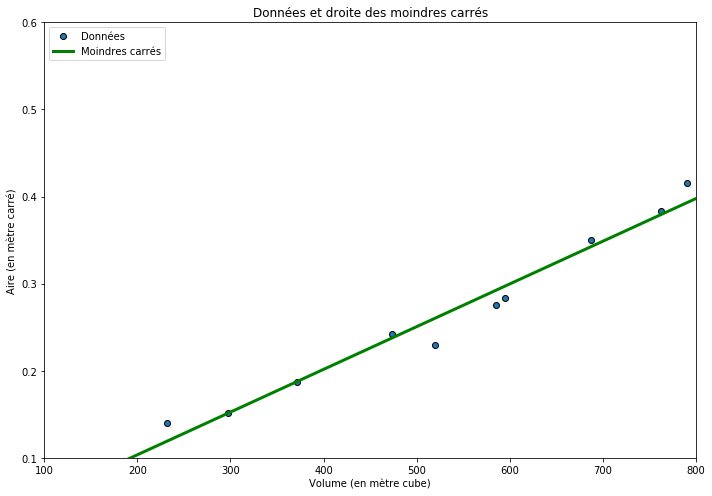

In [20]:
## Question 1.
url = "http://josephsalmon.eu/enseignement/datasets/arbres.txt"

df_arbres = np.genfromtxt(url, delimiter=' ', names=True)

#print(df_arbres)

df_arbres = pd.DataFrame(df_arbres)

#print("Colonne " + str(df_arbres.columns))

## Question 2.


# Je génère mon modèle de regression linéaire avec statsmodels
results = smf.ols("vol ~ aire", data=df_arbres).fit()

## Question 3.
# Je définis quelques variables pour simplifier l'affichage des graphiques
ymin_normal = 0.1
ymax_normal = 0.6
xmin_normal = 100
xmax_normal = 800

ylabels = "Volume (en mètre cube)"
xlabels = "Aire (en mètre carré)"

# Je créer l'axe des abscisses pour lequel on va évaluer le modèle
X_to_predict = np.linspace(100, 800, num=50).reshape(50, 1)
X_to_predict = pd.DataFrame(X_to_predict, columns=['aire'])


# J'affiche les données et la regression linéaire associée
fig = plt.figure(figsize=(10, 7))
plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.plot(df_arbres['aire'], df_arbres['vol'], 'o', label=r'Données', markeredgecolor='k', markeredgewidth=1)

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.plot(X_to_predict, results.predict(X_to_predict), linewidth=3, color='green', label=r"Moindres carrés")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.title("Données et droite des moindres carrés")
plt.tight_layout()
plt.show()